In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

## MNIST

In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
classes = len(set(Y_train).union(set(Y_test)))
print(classes)

input_shape = (28, 28, 1)

10


In [5]:
def transform(X):
    return np.expand_dims((X.astype("float32") / 255), -1)

X_train = transform(X_train)
X_test = transform(X_test)
Y_train = keras.utils.to_categorical(Y_train, classes)
Y_test = keras.utils.to_categorical(Y_test, classes)

In [6]:
import matplotlib.pyplot as plt

def show(x, y):
    print(x.shape)
    plt.imshow(x, cmap="gray")
    plt.title(y.argmax())

(28, 28, 1)


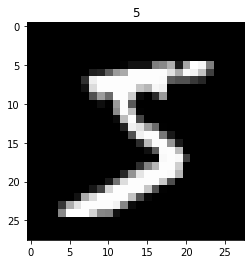

In [7]:
show(X_train[0], Y_train[0])

In [8]:
model_factories = []

In [9]:
from keras.layers import *

model_factories.append(
    lambda: keras.Sequential([
        keras.Input(shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(classes, activation="softmax"),
    ])
)


# model_factories.append(
#     lambda: keras.Sequential([
#         keras.Input(shape=input_shape),
#         Conv2D(8, kernel_size=(5, 5), activation="relu"),
#         MaxPooling2D(pool_size=(2, 2)),
#         Conv2D(16, kernel_size=(3, 3), activation="relu"),
#         MaxPooling2D(pool_size=(2, 2)),
#         Conv2D(16, kernel_size=(3, 3), activation="relu"),
#         MaxPooling2D(pool_size=(2, 2)),
#         Flatten(),
#         Dropout(0.5),
#         Dense(classes, activation="softmax"),
#     ])
# )


model_factories.append(
    lambda: keras.Sequential([
        keras.Input(shape=input_shape),
        Conv2D(6, kernel_size=(5, 5), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(5, 5), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.3),
        Dense(120, activation="relu"),
        Dropout(0.3),
        Dense(84, activation="relu"),
        Dropout(0.3),
        Dense(classes, activation="softmax"),
    ])
)

model_factories.append(
    lambda: keras.Sequential([
        keras.Input(shape=input_shape),
        Conv2D(6, kernel_size=(5, 5), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(5, 5), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(120, activation="relu"),
        Dropout(0.5),
        Dense(84, activation="relu"),
        Dropout(0.5),
        Dense(classes, activation="softmax"),
    ])
)

model_factories.append(
    lambda: keras.Sequential([
        keras.Input(shape=input_shape),
        Conv2D(10, kernel_size=(5, 5), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(120, activation="relu"),
        Dropout(0.5),
        Dense(64, activation="relu"),
        Dropout(0.5),
        Dense(classes, activation="softmax"),
    ])
)


models = list([x() for x in model_factories])

In [10]:
for i, model in enumerate(models):
    print("model", i, "=" * 70)
    model.summary()
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model 0 ======================================================================
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                           

In [11]:
model_fits = []
batch_size = 200
epochs = 15

for i, model in enumerate(models):
    print("model", i, "=" * 70)
    model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

model 0 ======================================================================
Epoch 1/15
270/270 [==============================] - 21s 76ms/step - loss: 0.4433 - accuracy: 0.8657 - val_loss: 0.0946 - val_accuracy: 0.9735
Epoch 2/15
270/270 [==============================] - 20s 75ms/step - loss: 0.1281 - accuracy: 0.9608 - val_loss: 0.0651 - val_accuracy: 0.9822
Epoch 3/15
270/270 [==============================] - 20s 75ms/step - loss: 0.0962 - accuracy: 0.9706 - val_loss: 0.0516 - val_accuracy: 0.9857
Epoch 4/15
270/270 [==============================] - 20s 75ms/step - loss: 0.0786 - accuracy: 0.9757 - val_loss: 0.0445 - val_accuracy: 0.9888
Epoch 5/15
270/270 [==============================] - 20s 75ms/step - loss: 0.0674 - accuracy: 0.9793 - val_loss: 0.0404 - val_accuracy: 0.9892
Epoch 6/15
270/270 [==============================] - 20s 76ms/step - loss: 0.0609 - accuracy: 0.9816 - val_loss: 0.0372 - val_accuracy: 0.9898
Epoch 7/15
270/270 [==============================] - 21s

In [12]:
best_model, best_acc, best_i = None, 0.0, 0

for i, model in enumerate(models):
    print("model", i, "=" * 70)
    loss, accuracy = model.evaluate(X_test, Y_test)
    print("loss:", loss, "accuracy", accuracy)
    
    if best_acc < accuracy:
        best_model = model
        best_acc = accuracy
        best_i = i

model 0 ======================================================================
313/313 [==============================] - 2s 5ms/step - loss: 0.0262 - accuracy: 0.9914
loss: 0.026184143498539925 accuracy 0.9914000034332275
model 1 ======================================================================
313/313 [==============================] - 1s 4ms/step - loss: 0.0293 - accuracy: 0.9909
loss: 0.029261404648423195 accuracy 0.9908999800682068
model 2 ======================================================================
313/313 [==============================] - 1s 4ms/step - loss: 0.0388 - accuracy: 0.9874
loss: 0.03879713639616966 accuracy 0.9873999953269958
model 3 ======================================================================
313/313 [==============================] - 1s 4ms/step - loss: 0.0268 - accuracy: 0.9924
loss: 0.026796532794833183 accuracy 0.9923999905586243


In [13]:
best_model, best_acc, best_i

(<keras.engine.sequential.Sequential at 0x2c4caccf850>, 0.9923999905586243, 3)

1/1 [==============================] - 0s 79ms/step
(28, 28, 1)


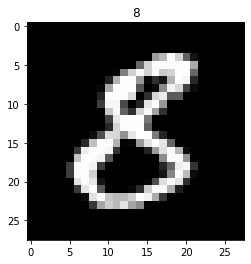

In [14]:
show(X_test[1234], best_model.predict(np.array([X_test[1234]])))

1/1 [==============================] - 0s 13ms/step
(28, 28, 1)


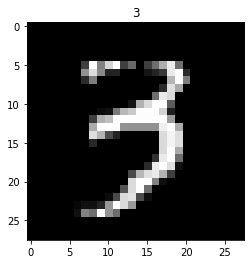

In [15]:
show(X_test[6542], best_model.predict(np.array([X_test[6542]])))

1/1 [==============================] - 0s 13ms/step
(28, 28, 1)


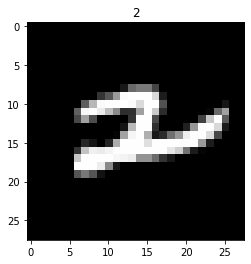

In [16]:
show(X_test[6721], best_model.predict(np.array([X_test[6721]])))

In [17]:
def count_cm_and_show_errors(X, Y, model):
    Y_pred = model.predict(X)
    cm = np.zeros((10, 10), dtype="int32")
    samples = [[None] * 10 for _ in range(10)]
    samples_prob = np.zeros((10, 10))
    for i in range(X.shape[0]):
        y_pred = Y_pred[i].argmax()
        y_real = Y[i].argmax()
        
        cm[y_real][y_pred] += 1
        
        for j in range(10):
            if samples_prob[y_real][j] < Y_pred[i][j]:
                samples_prob[y_real][j] = Y_pred[i][j]
                samples[y_real][j] = X[i]
    
    print(cm)

    fig, axes = plt.subplots(10, 10, figsize=(20, 20), sharex=True, sharey=True)
    for i in range(10):
        for j in range(10):
            if samples[i][j] is not None:
                axes[i][j].imshow(samples[i][j], cmap='gray')
    plt.show()
    
    print(samples_prob)

313/313 [==============================] - 1s 4ms/step
[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1131    0    1    0    1    1    1    0    0]
 [   1    0 1030    0    0    0    0    0    1    0]
 [   0    0    1 1004    0    3    0    1    1    0]
 [   0    0    0    0  974    0    2    0    2    4]
 [   1    0    2    5    0  882    1    1    0    0]
 [   3    2    0    0    1    1  949    0    2    0]
 [   0    2    8    1    0    0    0 1015    1    1]
 [   0    0    1    2    1    0    0    0  969    1]
 [   2    0    1    0    2    5    0    3    3  993]]


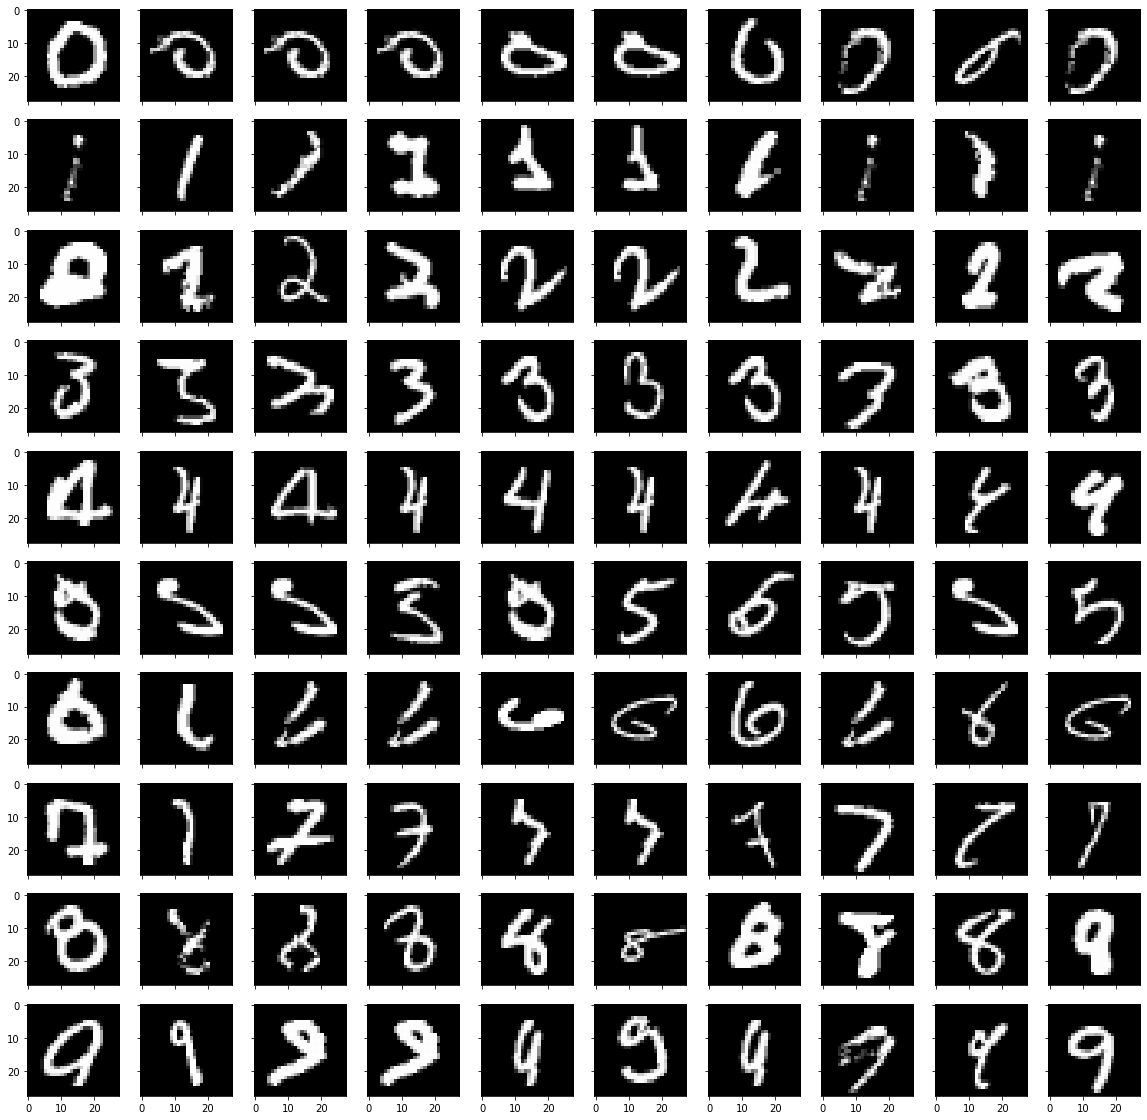

[[1.         0.00437876 0.24276562 0.03019711 0.01687474 0.04794757
  0.97405607 0.88615328 0.9024449  0.03907267]
 [0.00580312 1.         0.33309275 0.52663171 0.01830769 0.46201655
  0.95221561 0.48583844 0.11162993 0.0298587 ]
 [0.53671896 0.30306387 1.         0.10178515 0.02986648 0.01963273
  0.10552797 0.44356552 0.43575057 0.01078613]
 [0.00432727 0.0275583  0.69261307 1.         0.00256363 0.85502768
  0.00169273 0.91191298 0.65175664 0.08137345]
 [0.12179143 0.11508665 0.15757568 0.03880964 1.         0.01641504
  0.90312898 0.13635041 0.97012669 0.99771142]
 [0.62039423 0.18749233 0.43802458 0.99812764 0.01969346 1.
  0.99945468 0.53838772 0.0682153  0.10051685]
 [0.94059265 0.99934143 0.23080426 0.03134046 0.98044568 0.94032067
  1.         0.00353925 0.51345634 0.01646171]
 [0.01582136 0.69960219 0.99914181 0.94065267 0.05584023 0.01766505
  0.00288733 1.         0.99505508 0.65356159]
 [0.45550877 0.15107086 0.71610457 0.87285227 0.97799939 0.16994932
  0.29452309 0.27564

In [18]:
count_cm_and_show_errors(X_test, Y_test, best_model)

## Fashion MNIST

In [19]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.fashion_mnist.load_data()

In [20]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [21]:
classes = len(set(Y_train).union(set(Y_test)))
print(classes)

input_shape = (28, 28, 1)

10


(28, 28, 1)


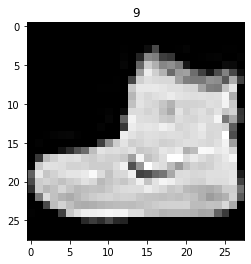

In [22]:
X_train = transform(X_train)
X_test = transform(X_test)
Y_train = keras.utils.to_categorical(Y_train, classes)
Y_test = keras.utils.to_categorical(Y_test, classes)

show(X_train[0], Y_train[0])

In [23]:
model = model_factories[best_i]()
model.summary()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 32)        2912      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 800)               0         
                                                                 
 dropout_10 (Dropout)        (None, 800)              

In [24]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
270/270 [==============================] - 11s 40ms/step - loss: 1.1447 - accuracy: 0.5851 - val_loss: 0.5723 - val_accuracy: 0.7817
Epoch 2/15
270/270 [==============================] - 11s 40ms/step - loss: 0.6774 - accuracy: 0.7498 - val_loss: 0.4791 - val_accuracy: 0.8115
Epoch 3/15
270/270 [==============================] - 11s 39ms/step - loss: 0.5957 - accuracy: 0.7859 - val_loss: 0.4346 - val_accuracy: 0.8373
Epoch 4/15
270/270 [==============================] - 10s 39ms/step - loss: 0.5452 - accuracy: 0.8069 - val_loss: 0.4078 - val_accuracy: 0.8500
Epoch 5/15
270/270 [==============================] - 11s 39ms/step - loss: 0.5121 - accuracy: 0.8198 - val_loss: 0.3789 - val_accuracy: 0.8578
Epoch 6/15
270/270 [==============================] - 10s 39ms/step - loss: 0.4829 - accuracy: 0.8294 - val_loss: 0.3576 - val_accuracy: 0.8645
Epoch 7/15
270/270 [==============================] - 11s 39ms/step - loss: 0.4644 - accuracy: 0.8371 - val_loss: 0.3448 - val_accuracy:

In [25]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("loss:", loss, "accuracy", accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.3012 - accuracy: 0.8898
loss: 0.301160991191864 accuracy 0.8898000121116638


313/313 [==============================] - 1s 4ms/step
[[881   1  13  24   4   3  70   0   4   0]
 [  2 973   0  16   4   0   3   0   2   0]
 [ 13   0 818   9  98   0  60   0   2   0]
 [ 20   4   7 913  27   0  28   0   1   0]
 [  1   1  48  37 866   0  46   0   1   0]
 [  0   0   0   0   0 978   0  16   0   6]
 [189   0  92  26  97   0 587   0   9   0]
 [  0   0   0   0   0  16   0 965   0  19]
 [  1   1   4   4   6   2   8   5 969   0]
 [  0   0   0   0   0   6   0  46   0 948]]


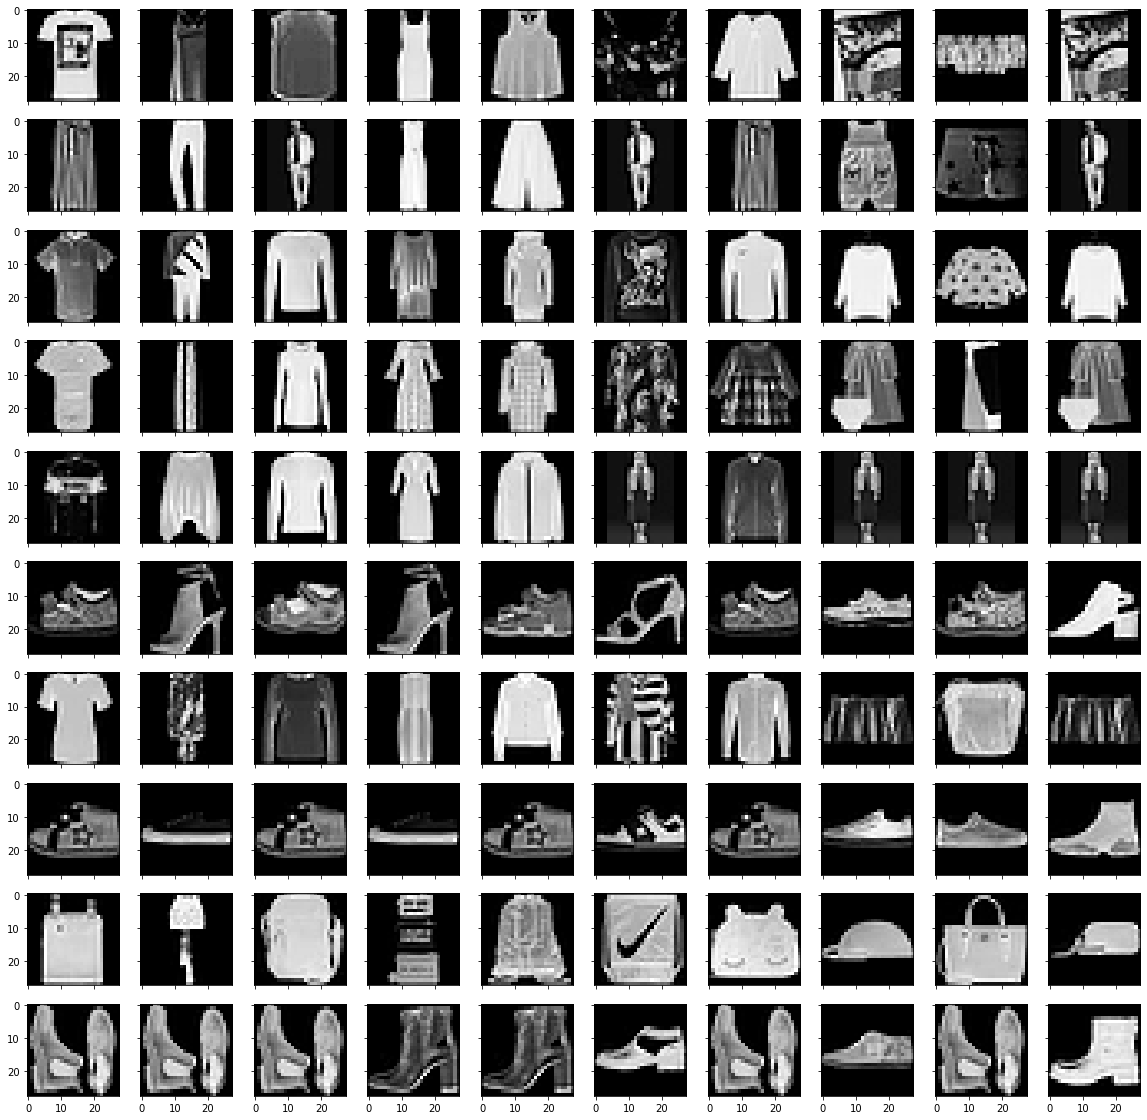

[[9.99530315e-01 6.99378490e-01 8.76214504e-01 9.98414397e-01
  4.90091145e-01 9.83840764e-01 7.05271065e-01 3.46755758e-02
  9.57577646e-01 2.05026679e-02]
 [3.74456197e-01 1.00000000e+00 1.95149645e-01 9.97397661e-01
  9.07005370e-01 2.81975605e-02 3.01511645e-01 6.55938452e-03
  7.43216157e-01 6.76276442e-03]
 [9.15996373e-01 3.06088597e-01 9.98650968e-01 9.29830611e-01
  9.08842862e-01 1.50900586e-02 9.67988729e-01 1.23969270e-02
  3.65739107e-01 7.82551058e-03]
 [9.87573326e-01 9.26009595e-01 8.68540108e-01 9.99992728e-01
  8.55625212e-01 1.82337463e-02 6.13846540e-01 2.23046876e-02
  9.82364416e-01 9.17142928e-02]
 [5.11755347e-01 5.07676125e-01 9.79313552e-01 9.99925137e-01
  9.84804273e-01 1.76939107e-02 9.25488591e-01 1.54880062e-02
  2.25802481e-01 1.47520136e-02]
 [5.54766366e-03 5.58177533e-04 1.76693767e-03 3.11370497e-03
  1.17706170e-03 1.00000000e+00 2.20841449e-03 9.82156992e-01
  9.15192515e-02 9.66423273e-01]
 [9.94137287e-01 1.51575193e-01 9.74854350e-01 9.92212355e

In [26]:
count_cm_and_show_errors(X_test, Y_test, model)